In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv("TMDB_tv_dataset_v3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166383 entries, 0 to 166382
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    166383 non-null  int64  
 1   name                  166378 non-null  object 
 2   number_of_seasons     166383 non-null  int64  
 3   number_of_episodes    166383 non-null  int64  
 4   original_language     166383 non-null  object 
 5   vote_count            166383 non-null  int64  
 6   vote_average          166383 non-null  float64
 7   overview              92549 non-null   object 
 8   adult                 166383 non-null  bool   
 9   backdrop_path         77098 non-null   object 
 10  first_air_date        134905 non-null  object 
 11  last_air_date         136737 non-null  object 
 12  homepage              50615 non-null   object 
 13  in_production         166383 non-null  bool   
 14  original_name         166378 non-null  object 
 15  

In [96]:
print(df.isnull().values.any())  #eksik deger var mı?

True


In [97]:
print(df.isnull().sum().sort_values(ascending=False)) #eksik değerler kaç tane var?

tagline                 161074
created_by              130225
homepage                115768
production_companies    107630
production_countries     89679
backdrop_path            89285
overview                 73834
networks                 69546
genres                   67628
poster_path              59099
spoken_languages         58174
languages                57415
first_air_date           31478
origin_country           31025
last_air_date            29646
name                         5
original_name                5
status                       0
id                           0
type                         0
popularity                   0
in_production                0
adult                        0
vote_average                 0
vote_count                   0
original_language            0
number_of_episodes           0
number_of_seasons            0
episode_run_time             0
dtype: int64


In [ ]:
for column in df.columns:
    if(column=='float64' or  column=='int64'):  #sayısal değişkense
        if df[column].isnull().any():  
            ort = df[column].mean()  
            df[column].fillna(ort, inplace=True)
    else:
         df[column].fillna(df[column].mode()[0], inplace=True)    #kategorik değişkense

In [104]:
print(df.isnull().values.any())  #eksik deger var mı?

False


In [ ]:
df=df[(df.number_of_seasons>0) & (df.number_of_episodes>0) ]   #aykırı değerleri sildik
df.info()

In [107]:
#En popüler Sovlar

In [108]:
en_populer=df.sort_values("popularity",ascending=False).head(20)   #false=azalan sıralama;popüler filmleri belirledik

In [ ]:
en_populer.popularity

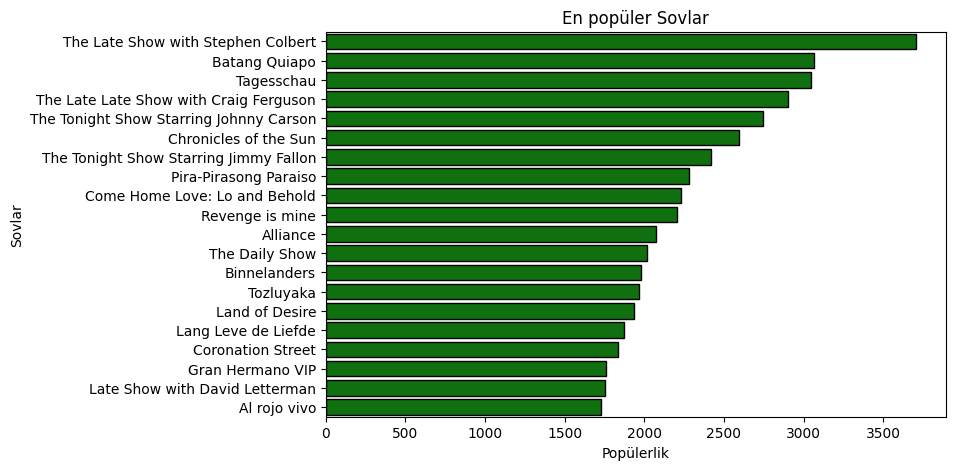

In [110]:
plt.figure(figsize=(8,5)) #büyüklük
sns.barplot(x=en_populer.popularity, y=en_populer.name,color="green",edgecolor="black") #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 0)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Popülerlik')
plt.ylabel('Sovlar')
plt.title('En popüler Sovlar')
plt.show()

In [111]:
#En populer 20 sovun kaç sezon oldugu

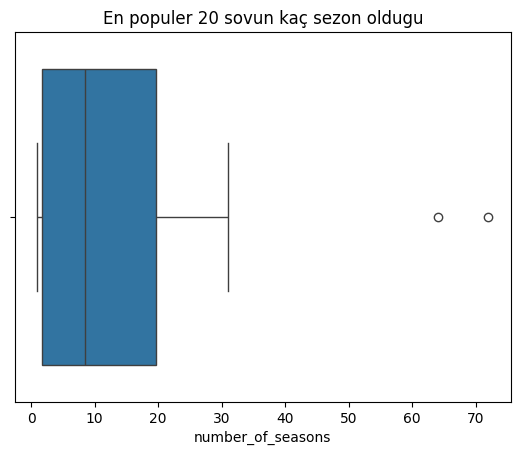

In [112]:
sns.boxplot(x=en_populer.number_of_seasons); #En iyi 20 şovun sezon sayilari
plt.title('En populer 20 sovun kaç sezon oldugu');

In [113]:
#En çok kullanılan orijinal diller

In [114]:
original_lang = df.original_language.value_counts().head(10) 

In [115]:
original_lang={'language':original_lang.index , 'count':original_lang.values}

In [ ]:
pd.DataFrame(original_lang)

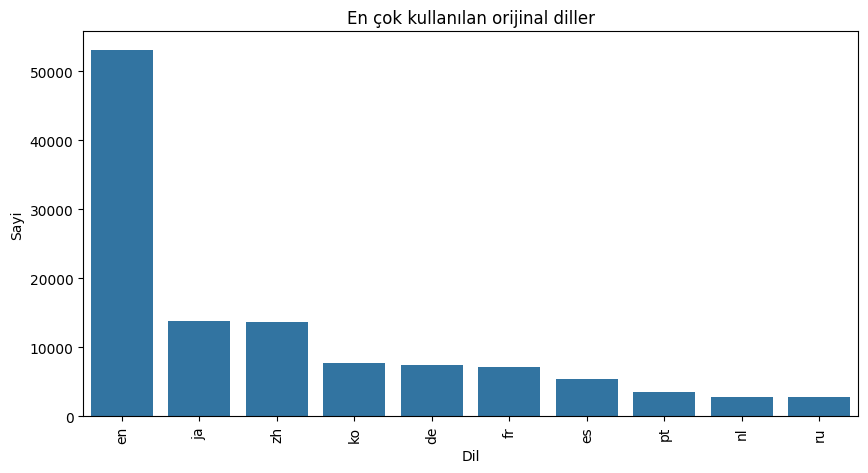

In [23]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=original_lang["language"], y=original_lang["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Dil')
plt.ylabel('Sayi')
plt.title('En çok kullanılan orijinal diller')
plt.show()

In [117]:
#En çok üretilen türler.

In [118]:
pop_genres=df.genres.value_counts().head(6)   #false=azalan sıralama;popüler filmleri belirledik

In [119]:
pop_genres={'Genres':pop_genres.index , 'count':pop_genres.values}

In [ ]:
pd.DataFrame(pop_genres)

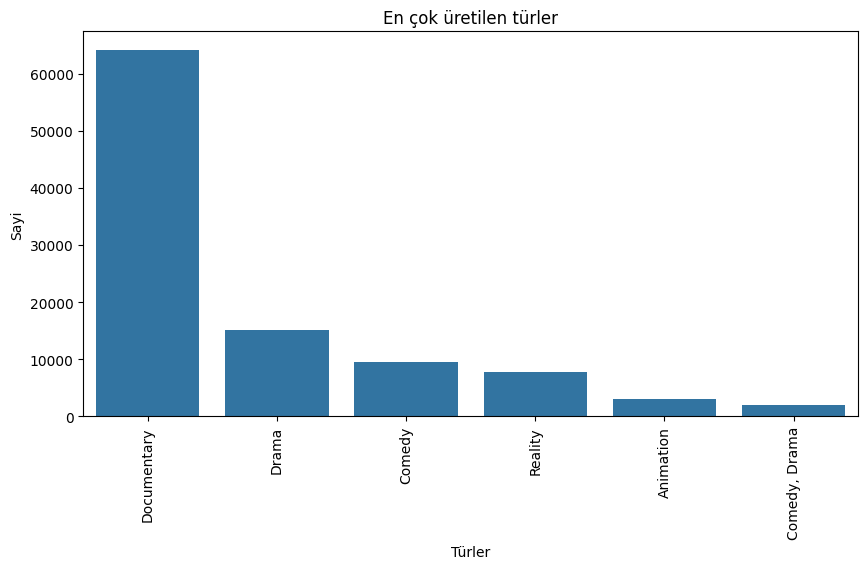

In [121]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=pop_genres["Genres"], y=pop_genres["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Türler')
plt.ylabel('Sayi')
plt.title('En çok üretilen türler')
plt.show()

In [122]:
#en cok üreten platform

In [123]:
netw=df.networks.value_counts().head(10)   #false=azalan sıralama;popüler filmleri belirledik

In [124]:
netw={'Network':netw.index , 'count':netw.values}

In [ ]:
pd.DataFrame(netw)

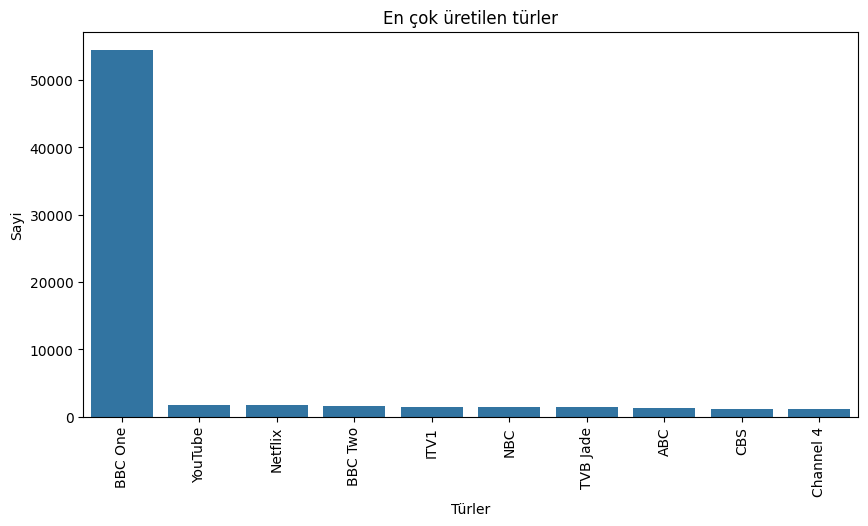

In [126]:
plt.figure(figsize=(10,5)) #büyüklük
sns.barplot(x=netw["Network"], y=netw["count"]) #x ve y eksenine hangi veriler gelecek
plt.xticks(rotation= 90)   #yazının derecesi 45 çapraz 90 dik
plt.xlabel('Türler')
plt.ylabel('Sayi')
plt.title('En çok üretilen türler')
plt.show()